In [26]:
import os
import sys
parent = os.path.realpath(os.path.join(os.path.abspath(''), os.pardir))
sys.path.append(parent)
import numpy as np
from databases.sql_connect import create_connection
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from databases.sql_connect import create_connection


sns.set_theme()
sns.set(context="paper", style="darkgrid", font="Times New Roman")
cm = 1/2.54
DB_CORR = os.path.join(parent,"databases", "TEMPRO_DB220501_Corr_results.db")
assert(os.path.exists(DB_CORR))
FONTSIZE = 8

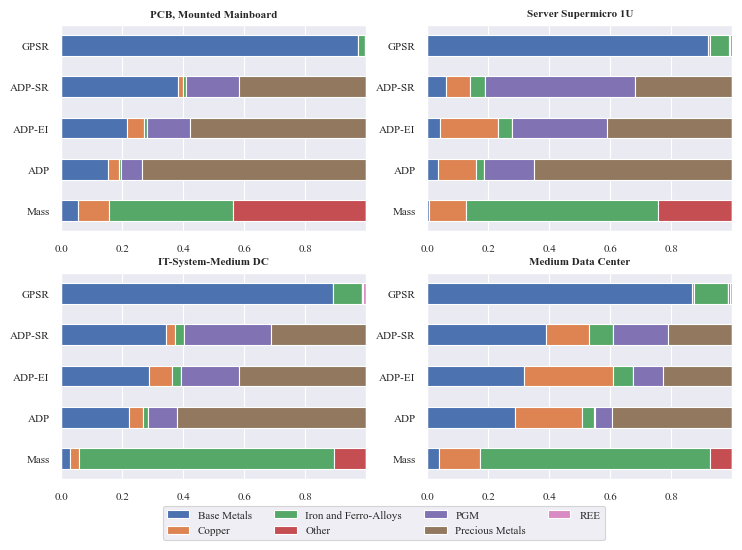

In [27]:
ps_ids = [3211, 4437, 5101, 6001]
fig, axs = plt.subplots(2, 2, figsize=(22*cm, 15*cm))

titles = ["PCB, Mounted Mainboard", "Server Supermicro 1U",
          "IT-System-Medium DC", "Medium Data Center"]
axs_l = [axs[0][0], axs[0][1], axs[1][0], axs[1][1]]
i = 0
for ps_id, ax in zip(ps_ids, axs_l):
    if True:
        group = ps_id-ps_id % 1000
        conn = create_connection(DB_CORR)
        query = f'SELECT * FROM [{group}LCAResults]'
        df = pd.read_sql_query(query, conn)

        conn.close()

        ps_results = df[df["ProductSystemID"] == ps_id]
        ps_results.set_index("Category", inplace=True)
        ps_name = list(ps_results["ProductSystemName"])[0]
        iis = {"EDIP- Total Minerals": "Mass",  # "Raw Material\n[kg]",
               "ADP-Minerals": "ADP",  # "Resource\nDepletion\n[kg Sb-eq]",
               "EI-Minerals": "ADP-EI",  # "Economic\nImportance\n[kg Sb-eq]",
               "SR-Minerals": "ADP-SR",  # Supply Risk\n[kg Sb-eq]",
               "GPR-Minerals": "GPSR",  # "Geo-Political\nRisk\n[kg Sb-eq]"
               }
        fractions = {"Group": ["Base Metals",
                               "Copper",
                               "Iron and Ferro-Alloys",
                               "Other",
                               "PGM",
                               "Precious Metals",
                               "REE"]}

        tab = pd.DataFrame(data=fractions)
        tab.set_index("Group", inplace=True)
        for impact in iis.keys():
            name = impact.split("-")[0]
        tab[name] = np.nan
        for name in iis.keys():
            for g in fractions["Group"]:
                fullname = name + "-"+g
                val = ps_results.loc[fullname, "Result"]
                tab.at[g, name.split("-")[0]] = val

        from copy import deepcopy
        tab_norm = deepcopy(tab)
        for c in tab.columns:
            tab_norm[c] *= (1/tab[c].sum())

        tab_norm = tab_norm[["EDIP", "ADP", "EI", "SR", "GPR"]]
        pd_t = tab_norm.transpose()

    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(FONTSIZE)
    pd_t.plot.barh(stacked=True, ax=ax)

    ax.set_yticklabels(list(iis.values()))
    ax.set_title(titles[i], fontweight='bold', fontsize=FONTSIZE)
    i += 1

    if ps_id != ps_ids[2]:
        ax.get_legend().remove()
    else:
        ax.legend(bbox_to_anchor=(1.8, -0.1),
                  loc="upper right", fontsize=FONTSIZE, ncols=4)
fig.savefig(
    f"ContributionBars/Overview-four.svg", bbox_inches='tight', dpi=600)


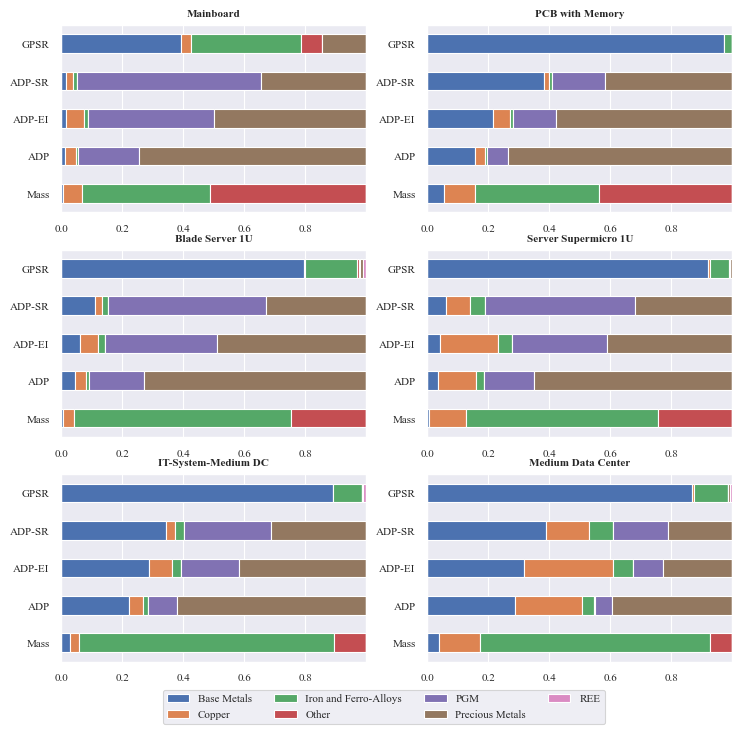

In [28]:
ps_ids = [3208, 3211,4401,4437, 5101, 6001]
fig, axs = plt.subplots(3, 2, figsize=(22*cm, 21*cm))

titles = ["Mainboard", "PCB with Memory", 
          "Blade Server 1U", "Server Supermicro 1U",
          "IT-System-Medium DC", "Medium Data Center"]
axs_l = [axs[0][0], axs[0][1], axs[1][0], axs[1][1], axs[2][0], axs[2][1]]
i = 0
for ps_id, ax in zip(ps_ids, axs_l):
    if True:
        group = ps_id-ps_id % 1000
        conn = create_connection(DB_CORR)
        query = f'SELECT * FROM [{group}LCAResults]'
        df = pd.read_sql_query(query, conn)

        conn.close()

        ps_results = df[df["ProductSystemID"] == ps_id]
        ps_results.set_index("Category", inplace=True)
        ps_name = list(ps_results["ProductSystemName"])[0]
        iis = {"EDIP- Total Minerals": "Mass",  # "Raw Material\n[kg]",
               "ADP-Minerals": "ADP",  # "Resource\nDepletion\n[kg Sb-eq]",
               "EI-Minerals": "ADP-EI",  # "Economic\nImportance\n[kg Sb-eq]",
               "SR-Minerals": "ADP-SR",  # Supply Risk\n[kg Sb-eq]",
               "GPR-Minerals": "GPSR",  # "Geo-Political\nRisk\n[kg Sb-eq]"
               }
        fractions = {"Group": ["Base Metals",
                               "Copper",
                               "Iron and Ferro-Alloys",
                               "Other",
                               "PGM",
                               "Precious Metals",
                               "REE"]}

        tab = pd.DataFrame(data=fractions)
        tab.set_index("Group", inplace=True)
        for impact in iis.keys():
            name = impact.split("-")[0]
        tab[name] = np.nan
        for name in iis.keys():
            for g in fractions["Group"]:
                fullname = name + "-"+g
                val = ps_results.loc[fullname, "Result"]
                tab.at[g, name.split("-")[0]] = val

        from copy import deepcopy
        tab_norm = deepcopy(tab)
        for c in tab.columns:
            tab_norm[c] *= (1/tab[c].sum())

        tab_norm = tab_norm[["EDIP", "ADP", "EI", "SR", "GPR"]]
        pd_t = tab_norm.transpose()

    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(FONTSIZE)
    pd_t.plot.barh(stacked=True, ax=ax)

    ax.set_yticklabels(list(iis.values()))
    ax.set_title(titles[i], fontweight='bold', fontsize=FONTSIZE)
    i += 1

    if ps_id != ps_ids[4]:
        ax.get_legend().remove()
    else:
        ax.legend(bbox_to_anchor=(1.8, -0.12),
                  loc="upper right", fontsize=FONTSIZE, ncols=4)
fig.savefig(
    f"ContributionBars/Overview-six.svg", bbox_inches='tight', dpi=600)
